기계학습 텀프로젝트

# 순서
1. 프로젝트 개요
2. 목표설정 및 설계
3. 전처리
4. 데이터 모델링 & 평가
5. Feature Selection
6. 결과 비교&분석

# 1. 프로젝트 개요


이번 프로젝트는 모바일 앱 데이터를 기반으로 앱 성공 요인을 분석하고, 이를 예측할 수 있는 머신러닝 모델을 개발하는 것을 목표로 하였다. Mobile App Statistics (Apple iOS App Store)를 사용하며, 총 평점 수를 성공 타겟으로 한다. 
앱의 평점 수와 같은 정량적 성과 지표를 타깃 변수로 설정하여, 다양한 Feature를 활용해 예측 모델의 성능을 평가하고 최적의 알고리즘을 선정하고자 하였다.

프로젝트는 데이터 전처리부터 Feature Selection, 모델 개발 및 하이퍼파라미터 튜닝에 이르기까지 단계적으로 진행되었다. 단순 회귀 모델(Ridge)부터 복잡한 앙상블 모델(Random Forest, Gradient Boosting, XGBoost)까지 다양한 알고리즘을 사용하여 모델의 성능을 비교하였으며, 성능 지표로 RMSE, MAE, MSLE를 선정하여 절대적 오차와 상대적 오차를 종합적으로 평가하였다.

Feature Selection을 통해 모델의 복잡성을 줄이고 과적합을 방지하려는 시도를 하였으나, 일부 복잡한 모델에서는 성능 저하가 발생하였다. 그러나 간단한 모델(Ridge)에서는 소폭의 성능 향상을 확인하였으며, Cross-Validation 결과에서도 Feature Selection이 일부 모델에서 긍정적인 영향을 미쳤음을 확인하였다.

최종적으로, 데이터의 특성과 모델의 성능 지표를 종합적으로 고려하여, 앱 성공 예측에 가장 적합한 알고리즘으로 Random Forest를 선정하였다. 

# 2. 목표설정 및 설계

### 2.1 목표설정
애플리케이션 성공 요인을 분석하고, 이를 기반으로 앱 스토어 데이터에서 총 평점 수(rating_count_tot)를 예측하는 회귀 모델을 개발하여 iOS 앱 성공 가능성을 예측한다.

### 2.2 데이터셋
이용 데이터: Mobile App Statistics (Apple iOS App Store)
타겟 변수: rating_count_tot (총 평점 수)
피처 16개 -> 사용하지 않는 피처 제거 후 13개

#### 데이터셋 확인
1. id: 앱 ID
* 각 앱의 고유 식별자
2. track_name: 앱 이름
* 앱의 이름 (텍스트 데이터로 모델에 영향이 적을 가능성 큼).
3. size_bytes: 앱 크기 (바이트 단위)
* 앱의 설치 크기, 사용자가 앱을 다운로드할 때 중요한 요소.
4. currency: 화폐 종류
* 앱 가격에 사용된 통화(예: USD, KRW 등). 범주형 데이터.
5. price: 가격
* 앱의 가격 (무료 앱은 0).
6. rating_count_tot: 사용자 평가 수 (모든 버전)
* 앱에 대해 사용자가 작성한 총 평가 수.
7. rating_count_ver: 사용자 평가 수 (현재 버전)
* 앱의 최신 버전에 대한 사용자 평가 수.
8. user_rating: 평균 사용자 평점 (모든 버전)
* 모든 버전을 기준으로 한 평균 평점 (1~5).
9. user_rating_ver: 평균 사용자 평점 (현재 버전)
* 최신 버전에 대한 평균 평점 (1~5).
10. ver: 최신 버전 코드
* 앱의 최신 버전 번호(예: 1.0, 2.3 등).
11. cont_rating: 콘텐츠 등급
* 사용 연령 제한 (예: 4+, 9+, 12+, 17+).
12. prime_genre: 주요 장르
* 앱의 주요 카테고리 (예: 게임, 교육, 엔터테인먼트 등).
13. sup_devices.num: 지원 장치 수
* 앱이 지원하는 iOS 장치의 개수.
14. ipadSc_urls.num: 아이패드 스크린샷 개수
* 앱이 아이패드에서 보여주는 스크린샷 개수.
15. lang.num: 지원 언어 수
* 앱이 지원하는 언어의 개수.
16. vpp_lic: VPP 라이선스 활성화 여부
VPP(Device-Based Volume Purchase Program) 라이선스 활성화 여부 (0 또는 1).


### 2.3 기계학습 모델 사용법
앱의 다양한 특성을 기반으로 rating_count_tot을 예측하는 회귀모델을 개발하기 위해 아래의 단계를 따랐다. 
1) 데이터 전처리: 결측값 처리, 특징 변환 및 선택, 데이터 분할
2) 모델 선정 및 학습
- ridge
- DecisionTreeRegressor
- GradientBoostingRegressor
- XGBoost
- SVR(Support Vector Regression)
각 모델은 교차 검증을 통해 성능을 측정하고, 하이퍼파라미터 튜닝을 수행해 최적화를 진행했다.
3) Feature Selection 진행
4) CV 성능 비교 분석
5) 최종 모델 평가

### 2.4 문제정의
입력과 정답이 주어진 데이터 구조로 인해 **지도학습(Supervised Learning)**에 속하며,
연속적인 목표 변수(rating_count_tot)를 예측하기 때문에 **회귀 문제(Regression Problem)**에 해당한다.

### 2.5 성능 지표
1) rmse: 예측값과 실제값의 평균적인 차이 파악
모바일 앱 성과 예측(예: rating_count_tot)에서는 소수의 앱이 많은 사용자의 평점을 받을 가능성이 큽니다. 이처럼 오차가 큰 경우 RMSE가 민감하게 반응하므로 중요한 정보를 제공할 수 있다.
2) MAE: 오차 크기에 대한 평균
모델의 전반적인 예측 정확도를 파악하는 데 유용하며, 극단적인 오차가 아닌 일반적인 오차의 크기를 파악하는 데 적합하다.
3) MSLE: 예측값과 실제값 차이를 로그 변환 후 제곱하여 평균
작은 값에서의 상대적 차이에 민감하며, 큰 값에서의 오차는 과소평가 됨

위 세 지표를 사용하면, RMSE는 큰 오차, MAE는 전체적인 평균 오차, MSLE는 상대적인 작은 오차를 강조할 수 있다. 
회귀모델에 적합하며, 각 지표가 데이터와 문제 특성을 다르게 평가하므로 함께 사용하면 모델 성능을 다각적으로 이해할 수 있을 것이다.
앱 성공 예측은 상위 몇 개 앱에 높은 평점 수가 집중되는 경우가 많으므로, 큰 값과 작은 값을 모두 고려해야 한다. 

### 2.6 최소한의 성능
RMSE와 MAE는 데이터 분포를 파악한 후 목표 수치를 설정할 것이다. (4번참고)
MSLE는 0.05 이하의 값을 목표로 한다. 


### 2.7 사전작업

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [211]:
#폰트 처리

font_path = "C:/Windows/Fonts/malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

plt.rcParams['axes.unicode_minus'] = False

### 2.7 데이터 확인

In [212]:
# 데이터 불러오기
app_df = pd.read_csv('./Applestore.csv')
appstore_df = app_df.copy()
appstore_df = appstore_df.drop(columns=['Unnamed: 0'])

In [213]:
appstore_df.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [214]:
appstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [215]:
appstore_df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [216]:
print("각 열의 유형 분류:")
numeric_features = appstore_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = appstore_df.select_dtypes(include=['object']).columns

print("\n수치형 특징:", list(numeric_features))
print("범주형 특징:", list(categorical_features))

각 열의 유형 분류:

수치형 특징: ['id', 'size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
범주형 특징: ['track_name', 'currency', 'ver', 'cont_rating', 'prime_genre']


In [217]:
appstore_df.isna().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64


데이터 확인 결과, 결측치는 존재하지 않는다.

# 3. 전처리

## 3.1 데이터 분포 시각화 및 상관관계 분석

### 3.1.1 Numerical dataset
* numerical dataset의 데이터 분포

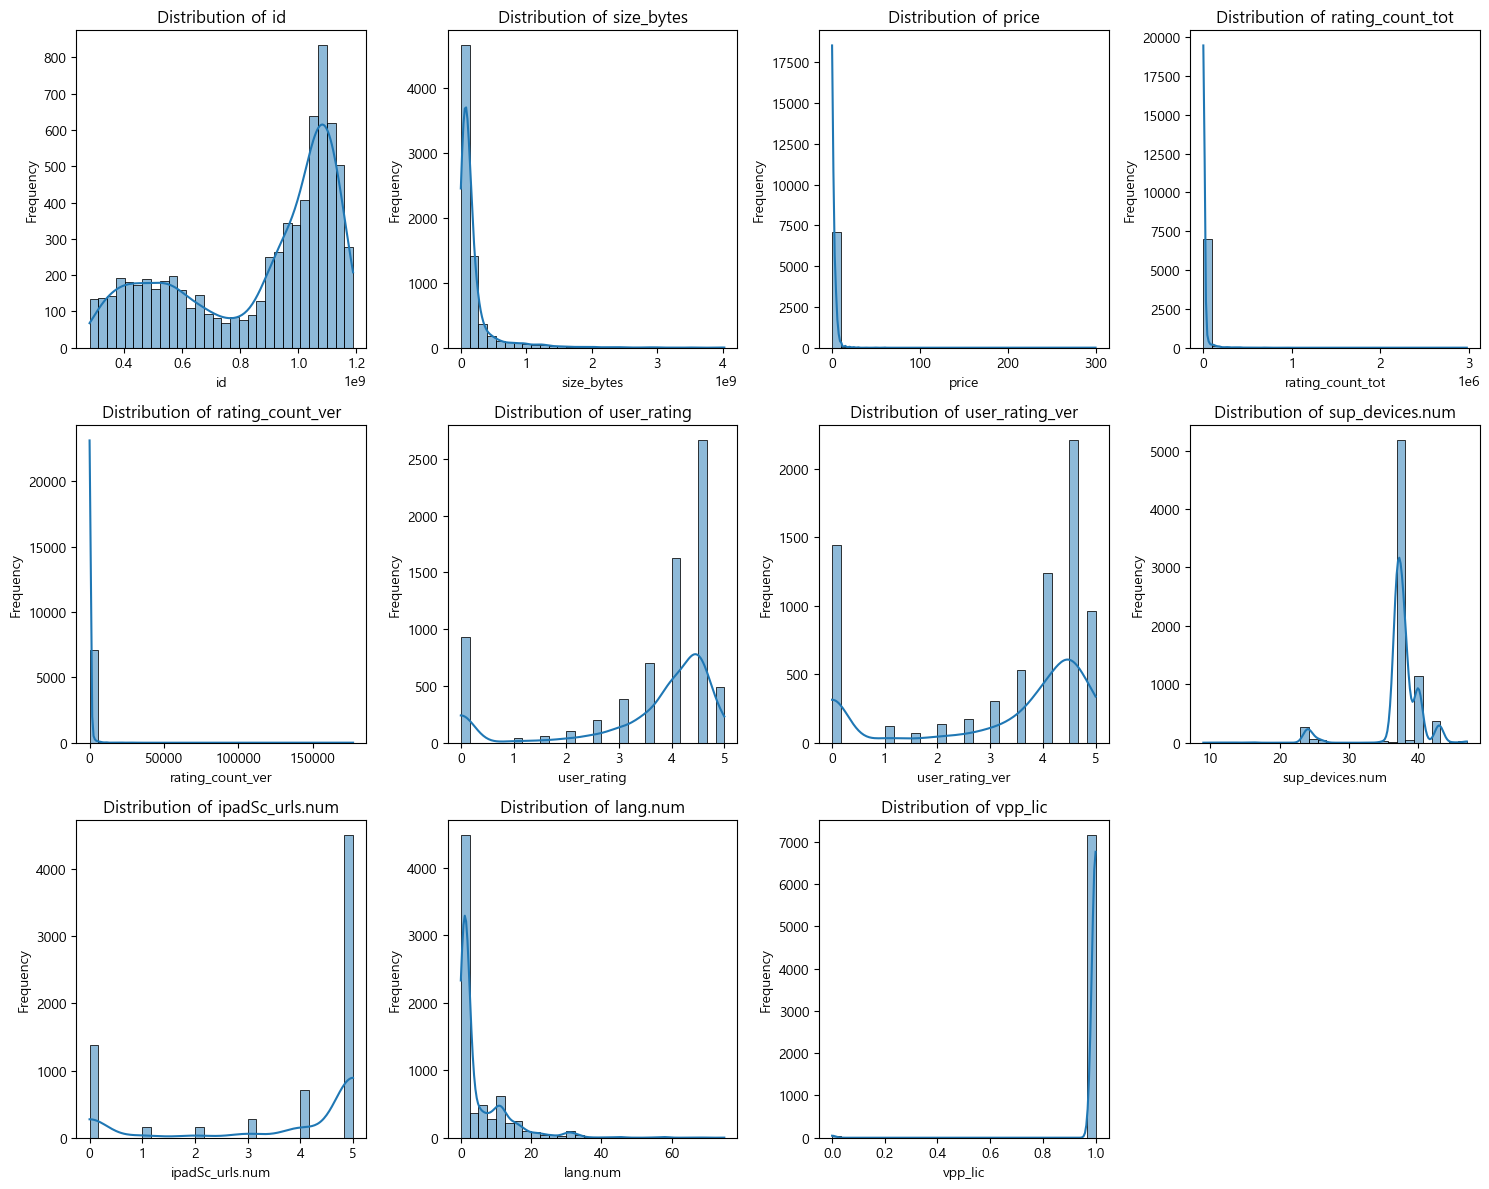

In [218]:
# 수치형 피처의 데이터 분포를 시각화
rows = 3  # 행의 수
cols = 4  # 열의 수
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # 축을 평탄화하여 접근하기 쉽게 만듦

for i, feature in enumerate(numeric_features):
    sns.histplot(appstore_df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for i in range(len(numeric_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


=== id 분석 ===
기본 통계량:
count    7.197000e+03
mean     8.631310e+08
std      2.712368e+08
min      2.816565e+08
25%      6.000937e+08
50%      9.781482e+08
75%      1.082310e+09
max      1.188376e+09
Name: id, dtype: float64
왜도: -0.720
첨도: -0.969
정규성 검정 p-value: 0.000


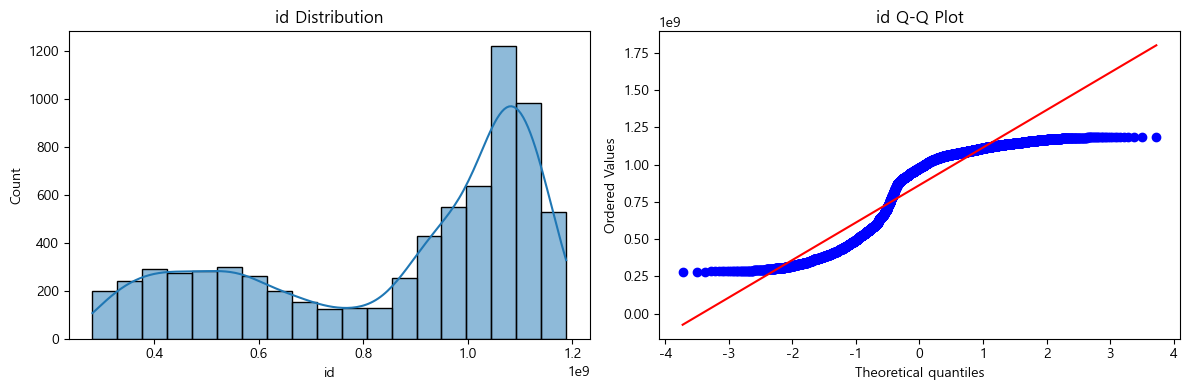


=== size_bytes 분석 ===
기본 통계량:
count    7.197000e+03
mean     1.991345e+08
std      3.592069e+08
min      5.898240e+05
25%      4.692275e+07
50%      9.715302e+07
75%      1.819249e+08
max      4.025970e+09
Name: size_bytes, dtype: float64
왜도: 4.924
첨도: 31.945
정규성 검정 p-value: 0.000


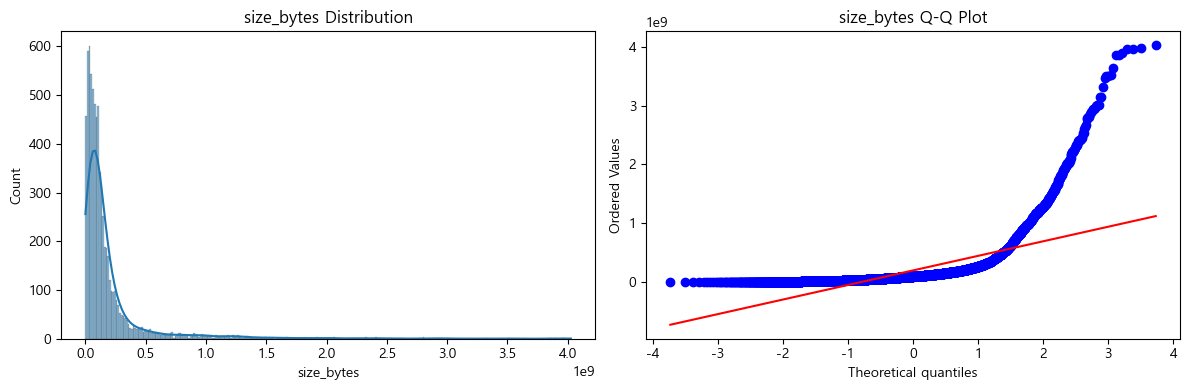


=== price 분석 ===
기본 통계량:
count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64
왜도: 31.415
첨도: 1427.027
정규성 검정 p-value: 0.000


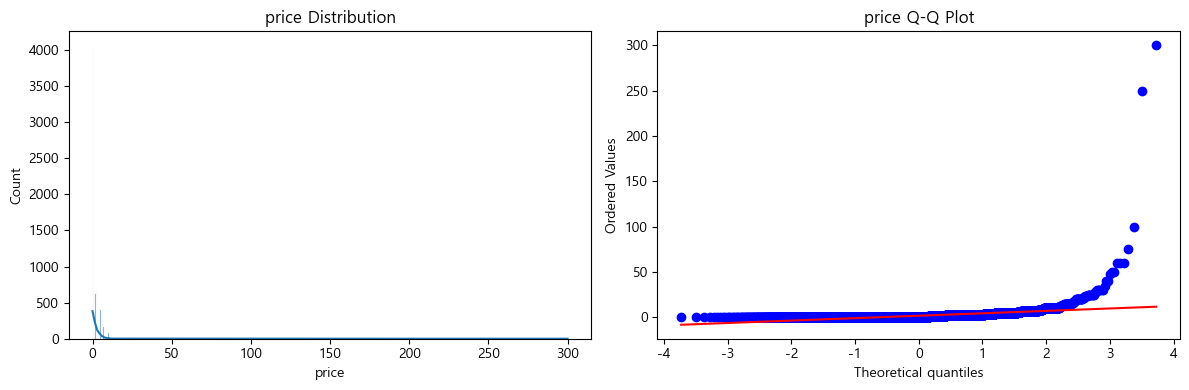


=== rating_count_tot 분석 ===
기본 통계량:
count    7.197000e+03
mean     1.289291e+04
std      7.573941e+04
min      0.000000e+00
25%      2.800000e+01
50%      3.000000e+02
75%      2.793000e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64
왜도: 19.595
첨도: 567.346
정규성 검정 p-value: 0.000


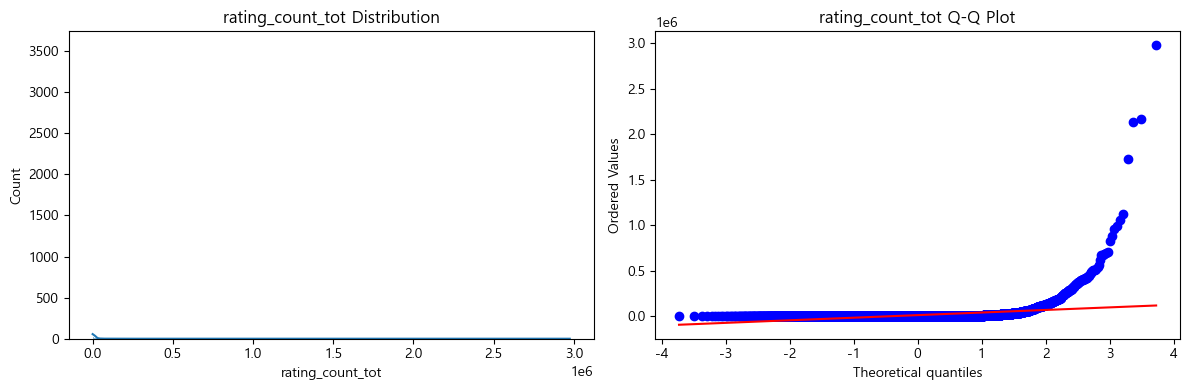


=== rating_count_ver 분석 ===
기본 통계량:
count      7197.000000
mean        460.373906
std        3920.455183
min           0.000000
25%           1.000000
50%          23.000000
75%         140.000000
max      177050.000000
Name: rating_count_ver, dtype: float64
왜도: 26.425
첨도: 892.672
정규성 검정 p-value: 0.000


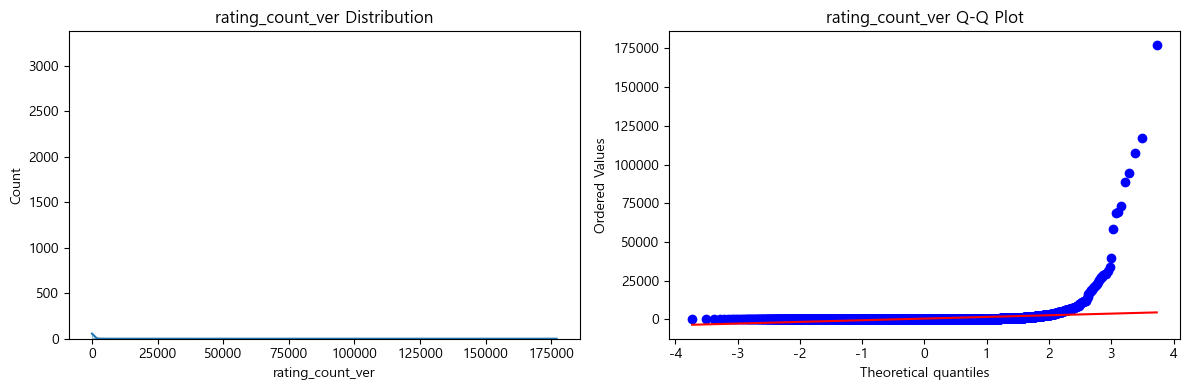


=== user_rating 분석 ===
기본 통계량:
count    7197.000000
mean        3.526956
std         1.517948
min         0.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64
왜도: -1.525
첨도: 0.983
정규성 검정 p-value: 0.000


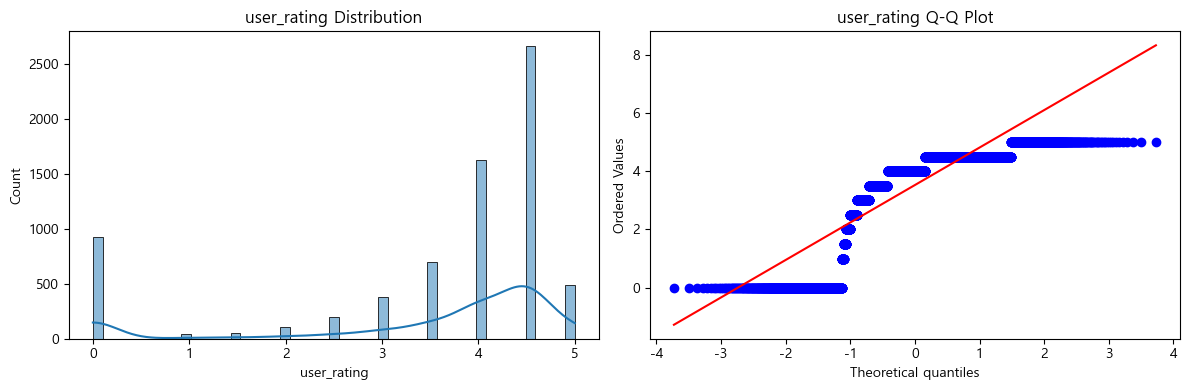


=== user_rating_ver 분석 ===
기본 통계량:
count    7197.000000
mean        3.253578
std         1.809363
min         0.000000
25%         2.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating_ver, dtype: float64
왜도: -0.984
첨도: -0.656
정규성 검정 p-value: 0.000


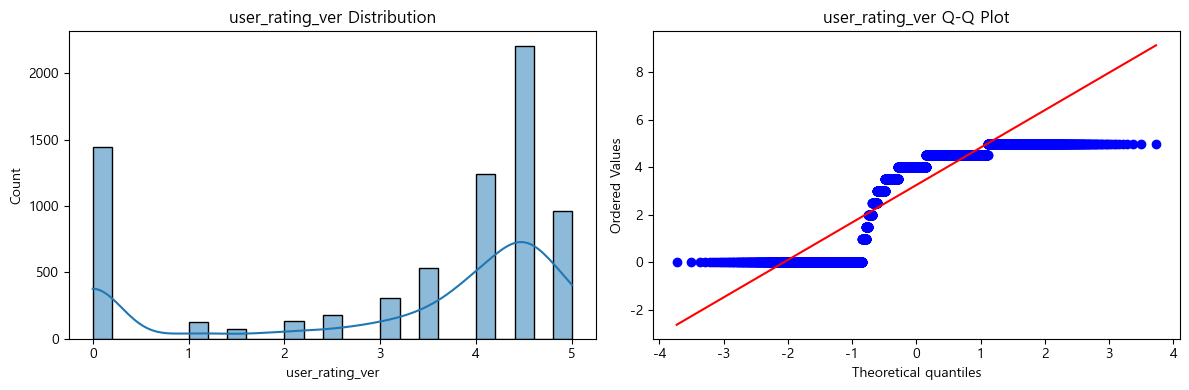


=== sup_devices.num 분석 ===
기본 통계량:
count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devices.num, dtype: float64
왜도: -2.706
첨도: 10.352
정규성 검정 p-value: 0.000


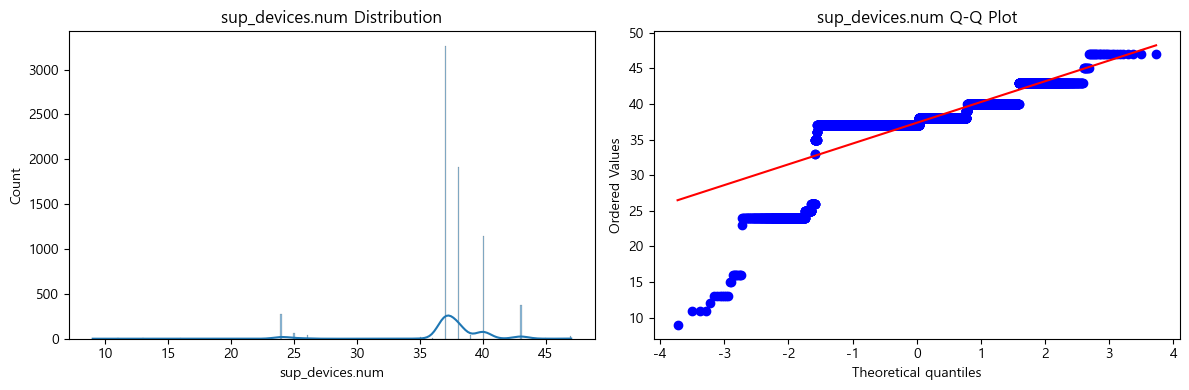


=== ipadSc_urls.num 분석 ===
기본 통계량:
count    7197.000000
mean        3.707100
std         1.986005
min         0.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ipadSc_urls.num, dtype: float64
왜도: -1.151
첨도: -0.460
정규성 검정 p-value: 0.000


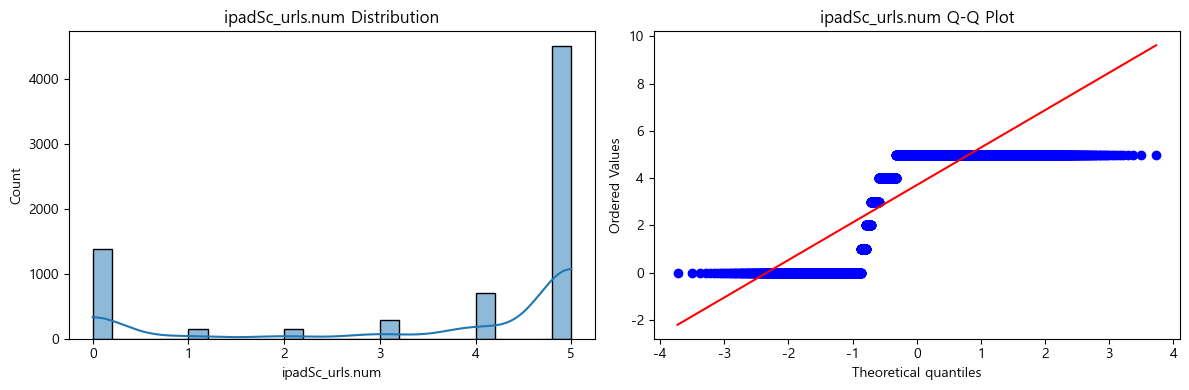


=== lang.num 분석 ===
기본 통계량:
count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang.num, dtype: float64
왜도: 2.867
첨도: 11.681
정규성 검정 p-value: 0.000


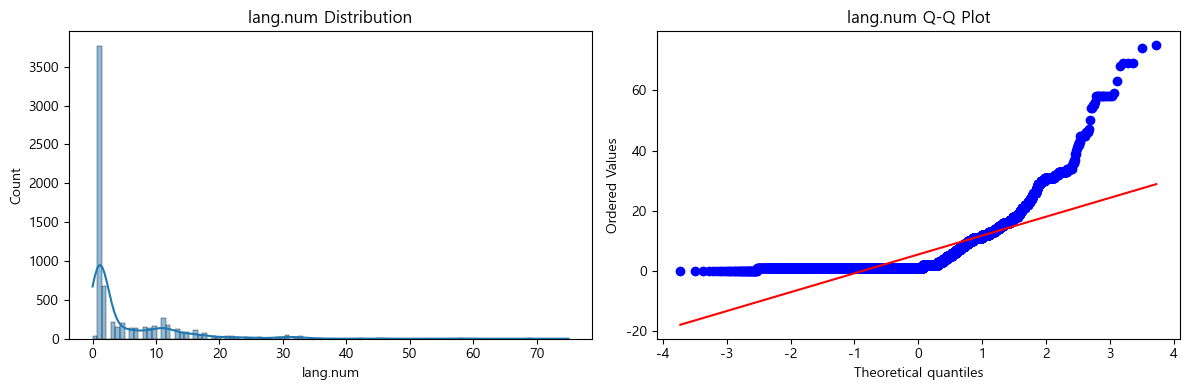


=== vpp_lic 분석 ===
기본 통계량:
count    7197.000000
mean        0.993053
std         0.083066
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: vpp_lic, dtype: float64
왜도: -11.875
첨도: 139.044
정규성 검정 p-value: 0.000


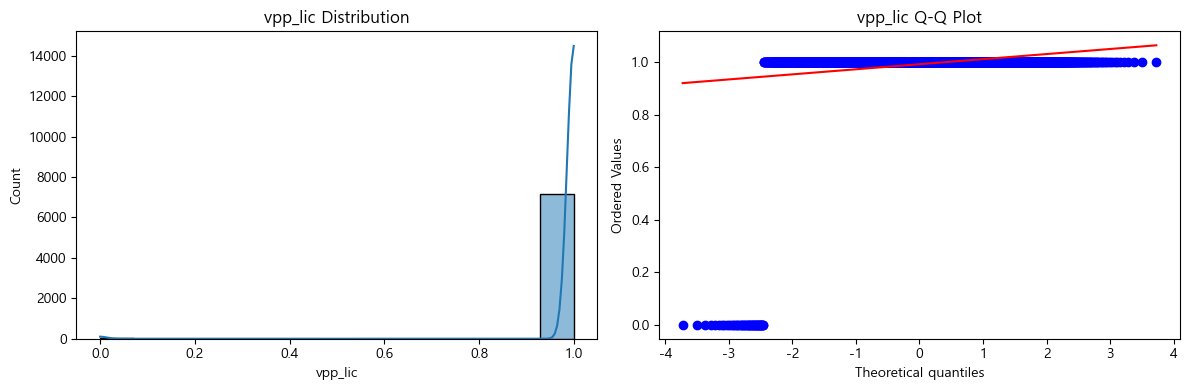

In [219]:
numeric_features = appstore_df.select_dtypes(include=['int64', 'float64']).columns

def analyze_numeric_distribution(df, features):
    for feature in features:
        # 기본 통계량
        stats_data = df[feature].describe()

        # 왜도와 첨도
        skewness = df[feature].skew()
        kurtosis = df[feature].kurtosis()

        # 정규성 검정
        if len(df[feature].dropna()) > 3:  # 최소 3개 이상의 데이터 필요
            _, normality_p = stats.normaltest(df[feature].dropna())
        else:
            normality_p = np.nan

        print(f"\n=== {feature} 분석 ===")
        print(f"기본 통계량:\n{stats_data}")
        print(f"왜도: {skewness:.3f}")
        print(f"첨도: {kurtosis:.3f}")
        print(f"정규성 검정 p-value: {normality_p:.3f}")

        # 분포 시각화
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[feature].dropna(), kde=True)
        plt.title(f'{feature} Distribution')

        plt.subplot(1, 2, 2)
        stats.probplot(df[feature].dropna(), dist="norm", plot=plt)
        plt.title(f'{feature} Q-Q Plot')

        plt.tight_layout()
        plt.show()

analyze_numeric_distribution(appstore_df, numeric_features)

 numeric dataset과의 상관관계

Correlations with rating_count_tot:
rating_count_tot    1.000000
rating_count_ver    0.163645
lang.num            0.137675
user_rating_ver     0.088744
user_rating         0.083310
ipadSc_urls.num     0.015734
sup_devices.num     0.008832
size_bytes          0.004486
vpp_lic            -0.000982
price              -0.039044
id                 -0.201976
Name: rating_count_tot, dtype: float64



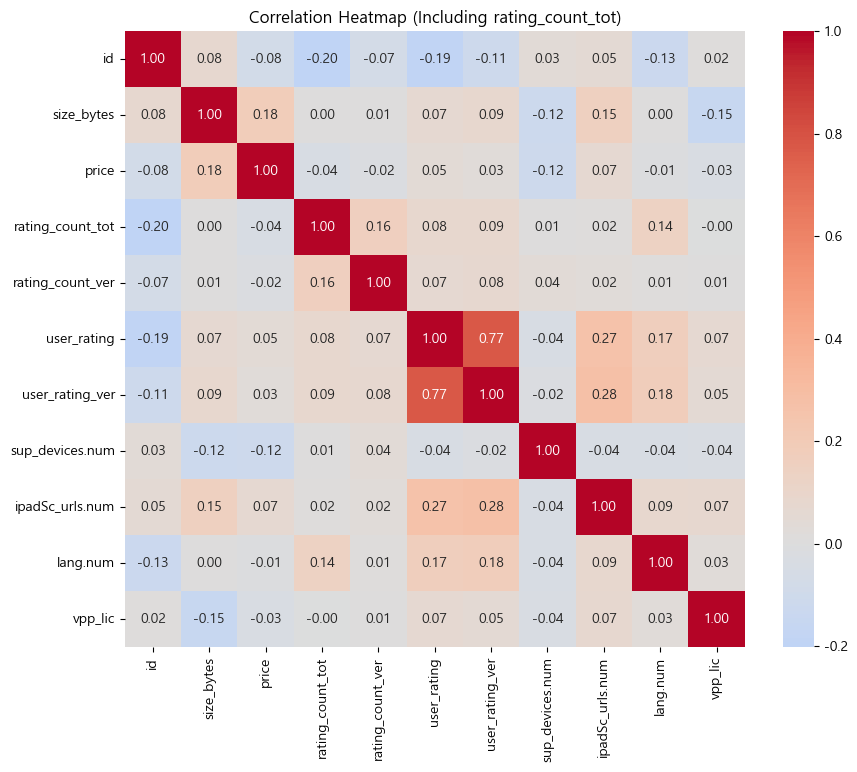

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 분석 함수
def analyze_target_correlations(df, target):

    # 수치형 변수만 선택
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    
    # 상관계수 계산
    correlation_matrix = numerical_df.corr()
    target_corr = correlation_matrix[target].sort_values(ascending=False)

    # 상관계수 결과 출력
    print(f"Correlations with {target}:\n{target_corr}\n")
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap (Including {target})')
    plt.show()

analyze_target_correlations(appstore_df, 'rating_count_tot')



## 3.1.2 categorical dataset


=== track_name ===
고유값 수: 7195
값 분포:
track_name
VR Roller Coaster                                   2
Mannequin Challenge                                 2
PAC-MAN Premium                                     1
European Qualifiers Official App                    1
Tooth Fairy Princess - Magical Adventure            1
                                                   ..
Heart of Vegas Slots – Casino Slot Machine Games    1
赤ペン 提出カメラ                                           1
J&J Official 7 Minute Workout                       1
Beautiful Japanese Handwriting                      1
Escape the Sweet Shop Series                        1
Name: count, Length: 7195, dtype: int64
값 비율(%):
track_name
VR Roller Coaster                                   0.027789
Mannequin Challenge                                 0.027789
PAC-MAN Premium                                     0.013895
European Qualifiers Official App                    0.013895
Tooth Fairy Princess - Magical Adventure            0

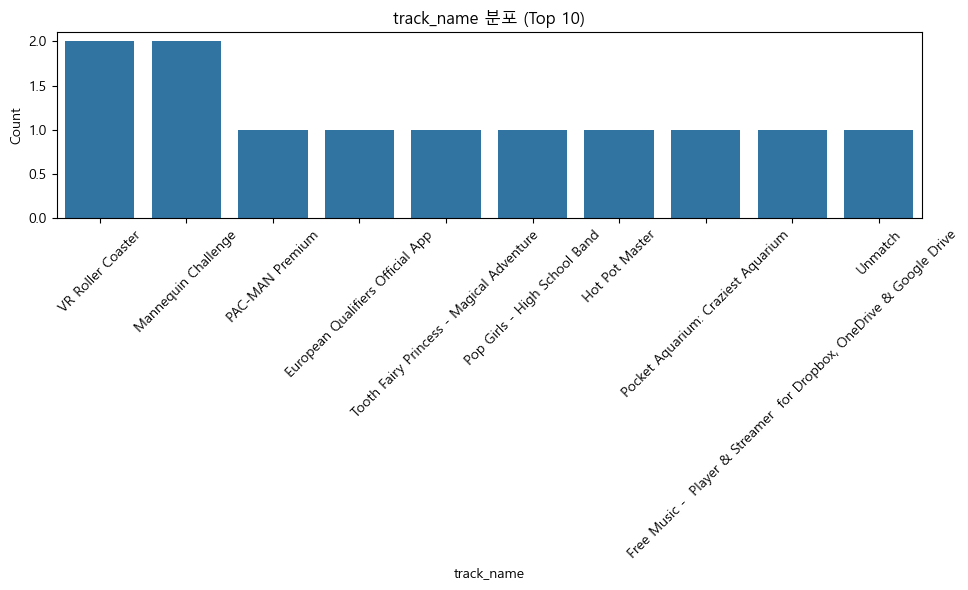


=== currency ===
고유값 수: 1
값 분포:
currency
USD    7197
Name: count, dtype: int64
값 비율(%):
currency
USD    100.0
Name: proportion, dtype: float64


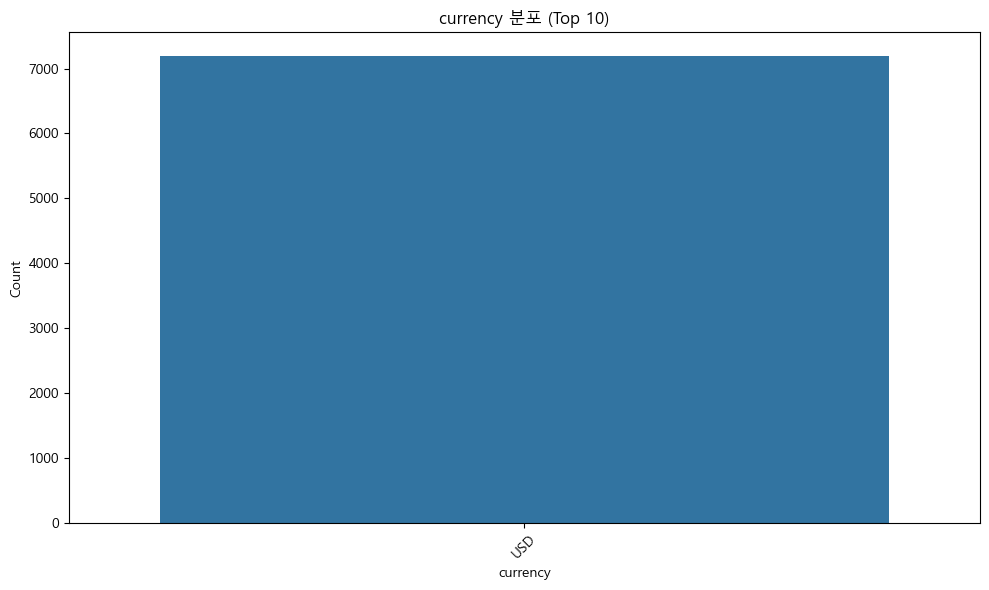


=== ver ===
고유값 수: 1590
값 분포:
ver
1.0         317
1.1         266
1.2         218
1.0.0       187
1.0.1       180
           ... 
3.8.4         1
7.13.0        1
1.7.7.78      1
8.0.5         1
2.0.20.1      1
Name: count, Length: 1590, dtype: int64
값 비율(%):
ver
1.0         4.404613
1.1         3.695984
1.2         3.029040
1.0.0       2.598305
1.0.1       2.501042
              ...   
3.8.4       0.013895
7.13.0      0.013895
1.7.7.78    0.013895
8.0.5       0.013895
2.0.20.1    0.013895
Name: proportion, Length: 1590, dtype: float64


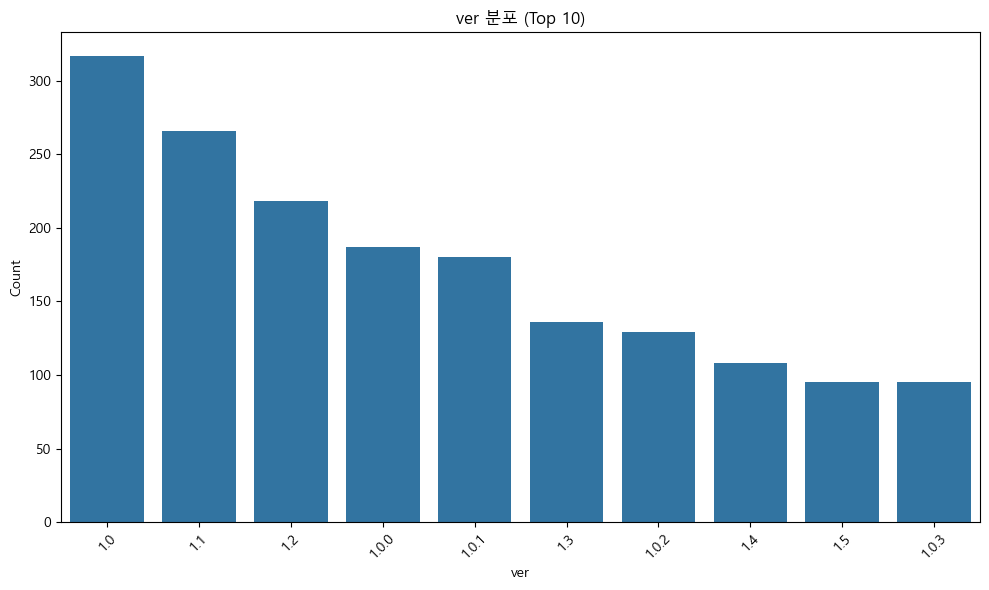


=== cont_rating ===
고유값 수: 4
값 분포:
cont_rating
4+     4433
12+    1155
9+      987
17+     622
Name: count, dtype: int64
값 비율(%):
cont_rating
4+     61.595109
12+    16.048353
9+     13.714048
17+     8.642490
Name: proportion, dtype: float64


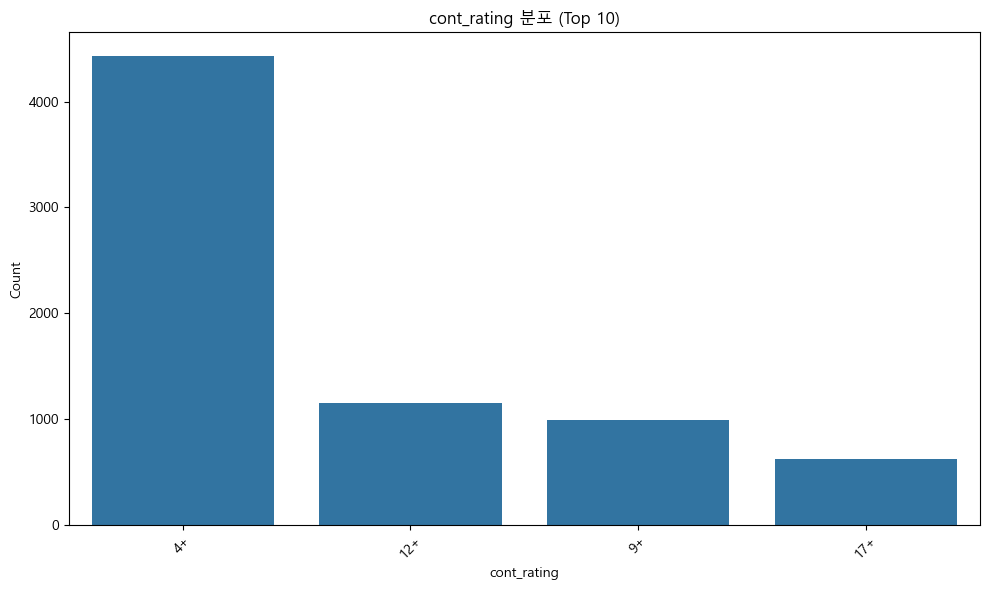


=== prime_genre ===
고유값 수: 23
값 분포:
prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64
값 비율(%):
prime_genre
Games                53.661248
Entertainment         7.433653
Education             6.294289
Photo & Video         4.849243
Utilities             3.445880
Health & Fitness      2.501042
Productivity          2.473253
Social Networking     2.320411
Lifestyle             2.000834
Music                 1.917

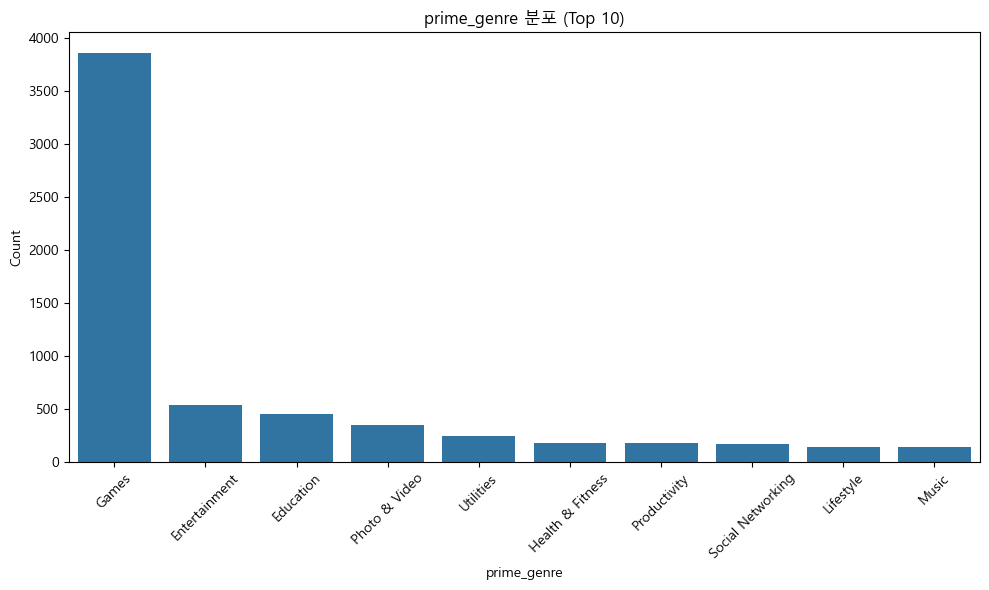

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 분석 함수
def analyze_categorical_distribution(df, features, top_n=10):
    for feature in features:
        print(f"\n=== {feature} ===")
        
        # 고유값 개수 및 분포
        unique_values = df[feature].nunique()
        value_counts = df[feature].value_counts()
        value_percentages = df[feature].value_counts(normalize=True) * 100
        
        print(f"고유값 수: {unique_values}")
        print("값 분포:")
        print(value_counts)
        print("값 비율(%):")
        print(value_percentages)
        
        # 시각화
        plt.figure(figsize=(10, 6))
        
        # 상위 top_n만 시각화
        top_values = value_counts.head(top_n)
        sns.barplot(x=top_values.index, y=top_values.values)
        plt.title(f"{feature} 분포 (Top {top_n})")
        plt.ylabel("Count")
        plt.xlabel(feature)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# 범주형 변수만 선택
categorical_features = appstore_df.select_dtypes(include=['object']).columns

# 분석 함수 호출
analyze_categorical_distribution(appstore_df, categorical_features, top_n=10)


In [222]:
appstore_df.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

## 3.2 전처리 계획
(각 데이터 별 상세한 내용은 후술함)

1. 무의미한 데이터 제거: id, track_name, currency
2. 수치형 데이터 표준화: size_bytes, price, rating_count_ver, user_rating, user_rating_ver, sup_devices.num, ipadSc_urls, lang.num
3. 0과 1로 구성된 데이터는 그대로 유지한다: vpp_lic
4. 그 자체로는 의미가 없으나 유의미하게 변환: ver (주 버전 추출 후 표준화/숫자 합산 후 표준화)
5. 숫자형 매핑 + 표준화: cont_rating
6. one-hot: prime_genre

In [223]:
preprocessing_plan = pd.DataFrame({
    '속성': appstore_df.columns,
    '데이터타입': appstore_df.dtypes,
    '변환방법': [
        '제거', #id
        '제거', #track_name
        '표준화', #size_bytes
        '제거', #currency
        '표준화', #price
        'target', #rating_count_tot
        '표준화', #rating_count_ver
        '표준화', #user_rating
        '표준화', #user_rating_ver
        '유의미하게 변환', #ver
        '숫자형 매핑+표준화', #cont_rating
        'one-hot', #prime_genre
        '표준화', #sup_devices.num
        '표준화', #ipadSc_urls
        '표준화', #lang.num
        '유지', #vpp_lic
    ]
})

print("=== 전처리 계획 ===")
print(preprocessing_plan)

=== 전처리 계획 ===
                                속성    데이터타입        변환방법
id                              id    int64          제거
track_name              track_name   object          제거
size_bytes              size_bytes    int64         표준화
currency                  currency   object          제거
price                        price  float64         표준화
rating_count_tot  rating_count_tot    int64      target
rating_count_ver  rating_count_ver    int64         표준화
user_rating            user_rating  float64         표준화
user_rating_ver    user_rating_ver  float64         표준화
ver                            ver   object    유의미하게 변환
cont_rating            cont_rating   object  숫자형 매핑+표준화
prime_genre            prime_genre   object     one-hot
sup_devices.num    sup_devices.num    int64         표준화
ipadSc_urls.num    ipadSc_urls.num    int64         표준화
lang.num                  lang.num    int64         표준화
vpp_lic                    vpp_lic    int64          유지


## 3.3 전처리

### 3.3.1 target 값 표준화
rating_count_tot은 표준화하여 target값으로 삼는다. (X,y로 나누는 과정은 후에 나옴)

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import StandardScaler
appstore_df['rating_count_tot_standardized'] = scaler.fit_transform(appstore_df[['rating_count_tot']])

### 3.3.2 제거
의미를 갖지 않는 id, track_name, currency는 제거한다.

In [225]:
appstore_df.drop(['id', 'track_name', 'currency'], axis=1, inplace=True)

### 3.3.3 이상치 수정, 제거 

In [226]:
numeric_columns = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 
                   'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num']

In [227]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    df['z_score'] = zscore(df[column])
    return df[df['z_score'].abs() <= threshold].drop(columns=['z_score'])

# Z-score 기준값을 4로 설정
for col in numeric_columns:
    appstore_df = remove_outliers_zscore(appstore_df, col, threshold=4)

print("=== 이상치 제거 후 데이터 ===")
print(appstore_df.describe())


=== 이상치 제거 후 데이터 ===
         size_bytes        price  rating_count_tot  rating_count_ver  \
count  6.918000e+03  6918.000000       6918.000000       6918.000000   
mean   1.666249e+08     1.449561       7512.304712        250.754553   
std    2.330571e+08     2.444552      26541.284435        854.587138   
min    5.898240e+05     0.000000          0.000000          0.000000   
25%    4.560768e+07     0.000000         26.000000          1.000000   
50%    9.480141e+07     0.000000        279.500000         21.000000   
75%    1.749051e+08     1.990000       2503.750000        130.000000   
max    1.629196e+09    23.990000     308844.000000      12554.000000   

       user_rating  user_rating_ver  sup_devices.num  ipadSc_urls.num  \
count  6918.000000      6918.000000      6918.000000      6918.000000   
mean      3.513154         3.230992        37.458803         3.697167   
std       1.527011         1.820556         3.448453         1.990529   
min       0.000000         0.000000   

### 3.3.4 numerical dataset 표준화

In [228]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import zscore

In [229]:
scaler = StandardScaler()
columns_to_scale = ['size_bytes', 'price', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num']
appstore_df[columns_to_scale] = scaler.fit_transform(appstore_df[columns_to_scale])

### 3.3.5 ver: 유의미하게 변환

In [230]:
#숫자형 버전만 필터
def extract_major_version(ver):
    try:
        return int(ver.split('.')[0])  # 주 버전만 추출
    except:
        return None  # 비정상적인 값은 None으로 처리

appstore_df['ver_major'] = appstore_df['ver'].apply(extract_major_version)

#숫자합산처리
appstore_df = appstore_df.dropna(subset=['ver_major'])  # 비정상적 데이터 제거

# 모든 숫자 합산
def sum_version_numbers(ver):
    numbers = map(int, re.findall(r'\d+', ver))
    return sum(numbers)

appstore_df['ver_sum'] = appstore_df['ver'].apply(sum_version_numbers)

# 총합 계산
total_major_updates = appstore_df['ver_major'].sum()
total_version_sum = appstore_df['ver_sum'].sum()

print("Total Major Updates:", total_major_updates)
print("Sum of All Version Numbers:", total_version_sum)

Total Major Updates: 114278.0
Sum of All Version Numbers: 2280586807


In [231]:
correlation_major = appstore_df['ver_major'].corr(appstore_df['rating_count_tot'])
correlation_sum = appstore_df['ver_sum'].corr(appstore_df['rating_count_tot'])

print(f"Correlation between ver_major and rating_count_tot: {correlation_major}")
print(f"Correlation between ver_sum and rating_count_tot: {correlation_sum}")

Correlation between ver_major and rating_count_tot: -0.002312946195881954
Correlation between ver_sum and rating_count_tot: -0.003745620000773378


In [232]:
from sklearn.preprocessing import StandardScaler
appstore_df['ver_sum_standardized'] = scaler.fit_transform(appstore_df[['ver_sum']])

appstore_df.drop(['ver', 'ver_major', 'ver_sum'], axis=1, inplace=True)

In [233]:
appstore_df.head(3)

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating_count_tot_standardized,ver_sum_standardized
0,-0.282512,1.039300,21292,-0.263017,0.318846,0.697095,4+,Games,0.156950,0.654564,0.733295,1,0.110902,-0.013497
1,-0.034527,-0.593019,161065,-0.263017,0.318846,0.147772,4+,Productivity,-0.133056,0.654564,2.651507,1,1.956477,-0.013497
2,-0.283646,-0.593019,188583,3.008975,-0.008615,0.697095,4+,Weather,-0.133056,0.654564,-0.299589,1,2.319827,-0.013497


object 타입의 ver 데이터는 최신 버전 코드이다. 버전 업데이트를 많이 한 어플일수록 사용자가 많다는 의미일 수 있기에, 이를 유의미한 numeric data로 변환하였다.
가장 major update 수치를 나타내는 맨 앞자리 수: ver_major
update 수치를 모두 더한 전체 수치: ver_sum

두 수치와 rating_count_tot의 correlation 비교 결과 ver_sum이 더 유의미하기에, ver_sum을 표준화한 수치만 남기고 나머지는 제거하였다.

### 3.3.6 cont_rating:숫자로 매핑+표준화

In [234]:
#숫자로 매핑
cont_rating_map = {'4+': 0, '9+': 1, '12+': 2, '17+': 3}
appstore_df['cont_rating_map'] = appstore_df['cont_rating'].map(cont_rating_map)

#표준화
scaler = StandardScaler()
appstore_df['cont_rating_map'] = scaler.fit_transform(appstore_df[['cont_rating_map']])

In [235]:
appstore_df.drop(['cont_rating'], axis=1, inplace=True)

콘텐츠 등급을 나타내는 cont_rating은 숫자로 매핑 후 표준화하였다.

### 3.3.7 prime_gerne: one-hot 인코딩

In [236]:
appstore_df = pd.get_dummies(appstore_df, columns=['prime_genre'], drop_first=True)

In [237]:
appstore_df.drop(['rating_count_tot'], axis=1, inplace=True)

장르를 나타내는 prime_gerne는 one-hot 인코딩하였다. 

## 3.4 전처리 완료 데이터 확인

In [ ]:
appstore_df.head(5)

In [239]:
appstore_df.describe()

,size_bytes,price,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating_count_tot_standardized,ver_sum_standardized,cont_rating_map
count,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6.910000e+03,6.910000e+03
mean,0.000075,0.000569,0.000221,-0.000037,0.000544,-0.000266,0.000333,0.000240,0.994501,-0.071134,-2.056564e-18,-1.028282e-17
std,1.000415,1.000469,1.000596,1.000116,0.999816,1.000587,0.999893,1.000469,0.073958,0.350354,1.000072e+00,1.000072e+00
min,-0.712474,-0.593019,-0.293443,-2.300840,-1.774856,-4.193141,-1.857514,-0.742253,0.000000,-0.170239,-1.349749e-02,-6.939603e-01
25%,-0.519175,-0.593019,-0.292273,-0.008615,-0.676211,-0.133056,-0.350267,-0.594698,1.000000,-0.169896,-1.349741e-02,-6.939603e-01
50%,-0.308224,-0.593019,-0.268868,0.318846,0.422434,-0.133056,0.654564,-0.594698,1.000000,-0.166548,-1.349728e-02,-6.939603e-01
75%,0.035006,0.221095,-0.140434,0.646307,0.697095,0.156950,0.654564,0.290630,1.000000,-0.137179,-1.349704e-02,2.927199e-01
max,6.276045,9.221348,14.397753,0.973767,0.971756,2.767005,0.654564,4.569718,1.000000,3.907763,8.243752e+01,2.266080e+00


## 3.5 train/test data 분리

target 데이터 rating_count_tot_standardized에 대해 X와 y로 분리하고, train dataset과 test dataset 분리하였다

In [240]:
y = appstore_df['rating_count_tot_standardized']
X = appstore_df.drop(columns=['rating_count_tot_standardized'])

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

모델 평가 전, 결측치를 확인하였다. 

In [242]:
appstore_df.isna().sum()

size_bytes                       0
price                            0
rating_count_ver                 0
user_rating                      0
user_rating_ver                  0
sup_devices.num                  0
ipadSc_urls.num                  0
lang.num                         0
vpp_lic                          0
rating_count_tot_standardized    0
ver_sum_standardized             0
cont_rating_map                  0
prime_genre_Business             0
prime_genre_Catalogs             0
prime_genre_Education            0
prime_genre_Entertainment        0
prime_genre_Finance              0
prime_genre_Food & Drink         0
prime_genre_Games                0
prime_genre_Health & Fitness     0
prime_genre_Lifestyle            0
prime_genre_Medical              0
prime_genre_Music                0
prime_genre_Navigation           0
prime_genre_News                 0
prime_genre_Photo & Video        0
prime_genre_Productivity         0
prime_genre_Reference            0
prime_genre_Shopping

# 4. 데이터 모델링 & 평가

* Baseline 모델을 정하고 그 모델보다 CV 성능이 개선된 모델을 찾는 과정
* 1개 이상의 앙상블 모델을 포함한 총 5개의 모델을 선택
* baseline 모델은 기본 파라미터로 설정된 모델을 사용하지 않고, 본인이 모델 파라미터를 이해하고 이를 임의로 조정한 모델을 사용

모델 설명
1. 모델 1: Ridge Regression
2. 모델 2: Decision Tree Regressor (기본 트리 모델로 성능 확인)
3. 모델 3: Random Forest Regressor (앙상블 모델 1)
4. 모델 4: Gradient Boosting Regressor (앙상블 모델 2)
5. 모델 5: XGBoost Regressor (Gradient Boosting 변형으로 추가 성능 확인)

실험 계획
1. K-fold Cross Validation:  5-fold CV를 모든 모델에 적용
2. 성능 지표: RMSE, MAE, MSLE

실험 과정
1. 기본 모델 선택 및 초기 실험
2. CV 이후 성능 비교
3. feature selection 이후 성능 비교
4. test-set에 대한 최종 성능 검증

실험 목표: target 표준화되었으므로

RMSE < 2.0

MAE < 0.5

MSLE < 0.05

## 4.1 기본 모델 선택 및 초기 실험

In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [244]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

#### 파라미터 조정

1. ridge
- alpha :값이 클수록 모델 복잡도가 줄어듦. feature 수가 많으므로 10으로 설정. 적절한 수준의 정규화를 적용하여 과적합을 방지하려 함.
2. Decision Tree
- max_depth: 트리의 최대 깊이. 깊이가 너무 깊으면 과적합, 너무 얕으면 과소적합될 수 있음. 과적합을 줄이기 위함.
- min_samples_split=5: 내부 노드를 분할하기 위한 최소 샘플 수.
- min_samples_leaf=3: 리프 노드가 가져야 할 최소 샘플 수를 3으로 설정. 데이터가 지나치게 세분화되는 것을 방지해 일반화 성능 향상.
3. Random Forest
- n_estimators: 너무 많으면 계산 비용 증가. 100개. 앙상블 효과 통해 안정적인 예측. 
- max_depth: 각 트리의 최대 깊이, 10으로 제한. 과적합 방지
4. Gradient Boosting
- n_estimators: 100으로 설정. 모델의 복잡도와 계산량을 조정.
- learning_rate=0.1: 각 단계의 기여도를 0.1로 제한. 낮은 학습률은 천천히 최적화를 진행하며, 일반적으로 더 좋은 성능을 내는 경우가 많음.
- max_depth=5: 각 트리의 최대 깊이를 5로 설정. 복잡도 제한하여 과적합 방지
5. XGBoost Regressor
- n_estimators=100: 위와 동일하게 설정
- learning_rate=0.1: 각 부스팅 단계의 기여도를 0.1로 제한.
- max_depth=5: 각 트리의 최대 깊이를 5로 설정.

In [245]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np
import pandas as pd

# 사용자 정의 하이퍼파라미터로 모델 정의
models = {
    "Ridge": Ridge(alpha=10),  # Ridge의 정규화 강도 조정
    "Decision Tree": DecisionTreeRegressor(
        max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42
    ),
}

# MSLE를 위한 사용자 정의 스코어
def msle_scorer(y_true, y_pred):
    return mean_squared_log_error(y_true + 1, y_pred + 1)

custom_msle_scorer = make_scorer(msle_scorer, greater_is_better=False)

# 결과 저장
results = {}

# K-Fold Cross-Validation으로 각 모델의 성능 측정
for name, model in models.items():
    # RMSE 계산
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    
    # MAE 계산
    mae_scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=5)
    mae_scores = -mae_scores
    
    # MSLE 계산
    msle_scores = cross_val_score(model, X, y, scoring=custom_msle_scorer, cv=5)
    msle_scores = -msle_scores  # 부호 반전 필요

    # 결과 저장
    results[name] = {
        "Mean RMSE": np.mean(rmse_scores),
        "Std RMSE": np.std(rmse_scores),
        "Mean MAE": np.mean(mae_scores),
        "Std MAE": np.std(mae_scores),
        "Mean MSLE": np.mean(msle_scores),
        "Std MSLE": np.std(msle_scores),
    }

# 결과를 DataFrame으로 출력
results_df = pd.DataFrame(results).T
print(results_df)


                   Mean RMSE  Std RMSE  Mean MAE   Std MAE  Mean MSLE  \
Ridge               0.296231  0.167861  0.140829  0.051624   0.015385   
Decision Tree       0.352466  0.143018  0.131601  0.061557   0.019401   
Random Forest       0.297980  0.156032  0.121759  0.056312   0.014904   
Gradient Boosting   0.316696  0.153072  0.130735  0.057160   0.016475   
XGBoost             0.295436  0.155384  0.117622  0.061078   0.014391   

                   Std MSLE  
Ridge              0.013588  
Decision Tree      0.013068  
Random Forest      0.012210  
Gradient Boosting  0.012810  
XGBoost            0.011951  


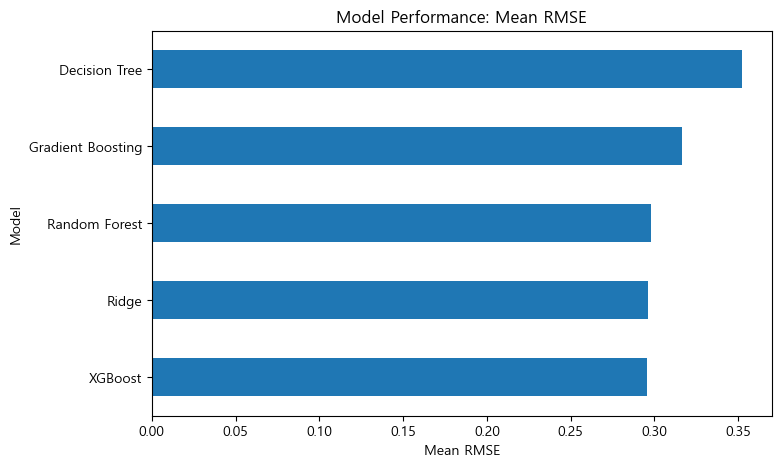

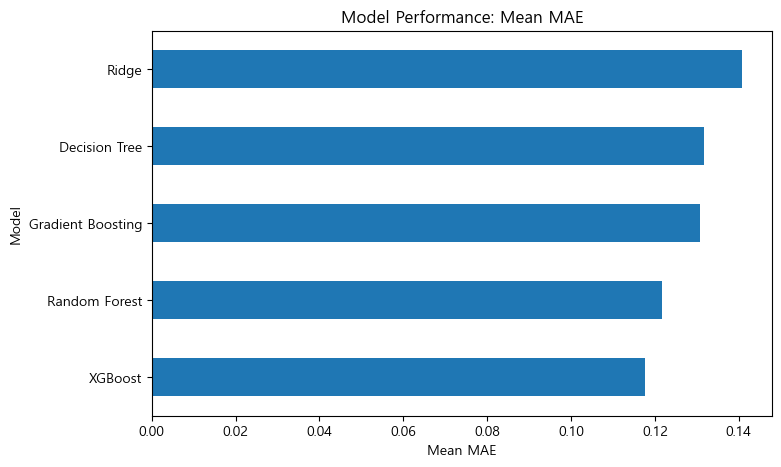

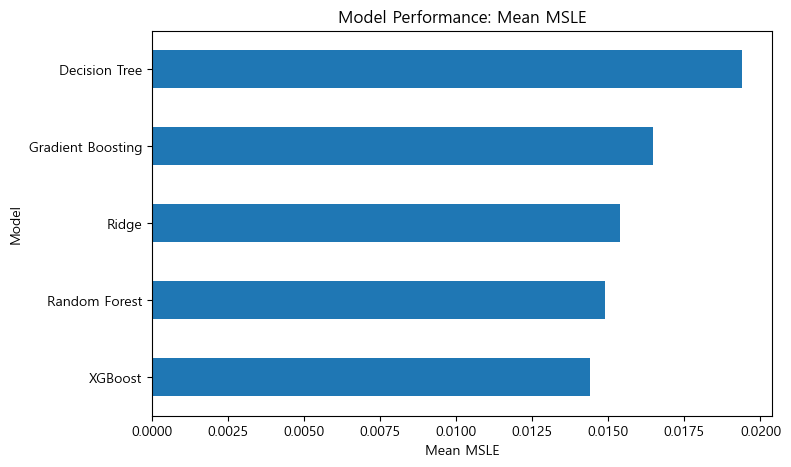

In [246]:
import matplotlib.pyplot as plt

# RMSE, MAE, MSLE 성능 시각화
metrics = ["Mean RMSE", "Mean MAE", "Mean MSLE"]

for metric in metrics:
    results_df[metric].sort_values().plot(kind='barh', figsize=(8, 5))
    plt.title(f"Model Performance: {metric}")
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.show()

# 4.2 CV

In [247]:
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# MSLE 계산을 위한 사용자 정의 스코어
def msle_scorer(y_true, y_pred):
    return mean_squared_log_error(y_true + 1, y_pred + 1)

custom_msle_scorer = make_scorer(msle_scorer, greater_is_better=False)

# 모델 평가 함수
def evaluate_model(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -neg_mse_scores  # MSE로 변환
    rmse_scores = np.sqrt(mse_scores)
    
    results = {
        'RMSE': np.mean(rmse_scores),
        'MAE': np.mean(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=kf)),
        'MSLE': np.mean(-cross_val_score(model, X, y, scoring=custom_msle_scorer, cv=kf))  # MSLE 계산
    }
    return results

### 4.2.1 ridge

In [248]:
# Ridge 하이퍼파라미터 범위 설정
ridge_params = {'alpha': [0.1, 1, 10, 100, 200, 500]}

# GridSearchCV로 최적 하이퍼파라미터 탐색
ridge_model = Ridge()
ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
ridge_grid.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", ridge_grid.best_params_)

# 최적 모델로 평가
best_ridge = ridge_grid.best_estimator_
results = evaluate_model(best_ridge, X_train, y_train, cv=5)

# 결과 출력
print("Train RMSE:", results['RMSE'])
print("Train MAE:", results['MAE'])
print("Train MSLE:", results['MSLE'])

Best Parameters: {'alpha': 100}
Train RMSE: 0.33404369641533516
Train MAE: 0.13205217615434456
Train MSLE: 0.014067128616017258


## 4.2.2 Decision Tree

In [249]:
# Decision Tree 하이퍼파라미터 범위 설정
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Decision Tree):", dt_grid.best_params_)

# 최적 모델로 평가
best_dt = dt_grid.best_estimator_
results = evaluate_model(best_dt, X_train, y_train, cv=5)

# 결과 출력
print("Train RMSE (Decision Tree):", results['RMSE'])
print("Train MAE (Decision Tree):", results['MAE'])
print("Train MSLE (Decision Tree):", results['MSLE'])


Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Train RMSE (Decision Tree): 0.37329412260699807
Train MAE (Decision Tree): 0.12639415947877194
Train MSLE (Decision Tree): 0.018066658046611464


## 4.2.3 random forest

In [250]:
# Random Forest 하이퍼파라미터 범위 설정
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV로 최적 하이퍼파라미터 탐색
rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=20,  # 랜덤 조합 20개 탐색
    scoring='neg_mean_squared_error',  # MSE 기반
    cv=5,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", rf_random.best_params_)

# 최적 모델로 평가
best_rf = rf_random.best_estimator_
results = evaluate_model(best_rf, X_train, y_train, cv=5)

# 결과 출력
print("Train RMSE:", results['RMSE'])
print("Train MAE:", results['MAE'])
print("Train MSLE:", results['MSLE'])

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Train RMSE: 0.3191482905009956
Train MAE: 0.11268137879750192
Train MSLE: 0.012817495630415357


## 4.2.4 Gradient Boosting Regressor

In [251]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [252]:
# Gradient Boosting 하이퍼파라미터 범위 설정
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Gradient Boosting):", gb_grid.best_params_)

# 최적 모델로 평가
best_gb = gb_grid.best_estimator_
results = evaluate_model(best_gb, X_train, y_train, cv=5)

# 결과 출력
print("Train RMSE (Gradient Boosting):", results['RMSE'])
print("Train MAE (Gradient Boosting):", results['MAE'])
print("Train MSLE (Gradient Boosting):", results['MSLE'])

Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Train RMSE (Gradient Boosting): 0.3280094150818571
Train MAE (Gradient Boosting): 0.11956728466009955
Train MSLE (Gradient Boosting): 0.013421710909458215


## 4.2.5 XGBoost Regressor

In [253]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [254]:
# XGBoost 하이퍼파라미터 범위 설정
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# RandomizedSearchCV로 최적 하이퍼파라미터 탐색
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=20,  # 랜덤 조합 20개 탐색
    scoring='neg_mean_squared_error',  # MSE 기반
    cv=5,
    random_state=42,
    n_jobs=-1
)
xgb_random.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters (XGBoost):", xgb_random.best_params_)

# 최적 모델로 평가
best_xgb = xgb_random.best_estimator_
results = evaluate_model(best_xgb, X_train, y_train, cv=5)

# 결과 출력
print("Train RMSE (XGBoost):", results['RMSE'])
print("Train MAE (XGBoost):", results['MAE'])
print("Train MSLE (XGBoost):", results['MSLE'])

Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Train RMSE (XGBoost): 0.3148790528364559
Train MAE (XGBoost): 0.1115594511850784
Train MSLE (XGBoost): 0.012099626274446388


## 4.3 CV 최종 결과 비교

In [255]:
# 각 모델의 이름과 평가 결과를 저장할 리스트
models = ["Ridge", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
results_list = []

# 각 모델의 평가 결과 추가
results_list.append(evaluate_model(best_ridge, X_train, y_train, cv=5))
results_list.append(evaluate_model(best_dt, X_train, y_train, cv=5))
results_list.append(evaluate_model(best_rf, X_train, y_train, cv=5))
results_list.append(evaluate_model(best_gb, X_train, y_train, cv=5))
results_list.append(evaluate_model(best_xgb, X_train, y_train, cv=5))

# 수치 결과만 포함한 DataFrame 생성
results_df = pd.DataFrame(results_list, index=models)
results_df.index.name = "Model"
results_df.reset_index(inplace=True)

# 결과 출력
print(results_df)

               Model      RMSE       MAE      MSLE
0              Ridge  0.334044  0.132052  0.014067
1      Decision Tree  0.373294  0.126394  0.018067
2      Random Forest  0.319148  0.112681  0.012817
3  Gradient Boosting  0.328009  0.119567  0.013422
4            XGBoost  0.314879  0.111559  0.012100


# 5. Feature Selection

## 5.1 상관계수 기반 특성 선택

size_bytes              0.013887
price                  -0.107819
rating_count_ver        0.297127
user_rating             0.133713
user_rating_ver         0.142275
sup_devices.num        -0.006002
ipadSc_urls.num         0.056157
lang.num                0.120959
vpp_lic                -0.029099
ver_sum_standardized   -0.004081
cont_rating_map        -0.006769
dtype: float64


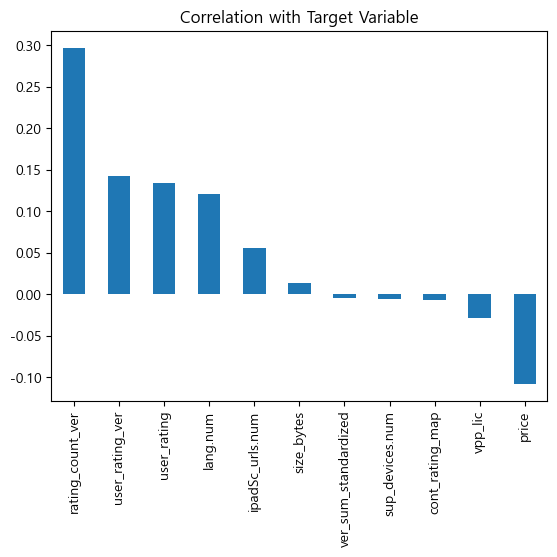

In [256]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])

# X_train과 y_train의 상관계수 계산
correlation = numeric_features.corrwith(y_train)

# 상관계수 출력 및 시각화
print(correlation)
correlation.sort_values(ascending=False).plot(kind='bar', title='Correlation with Target Variable')
plt.show()

## 5.2 비선형 관계 확인

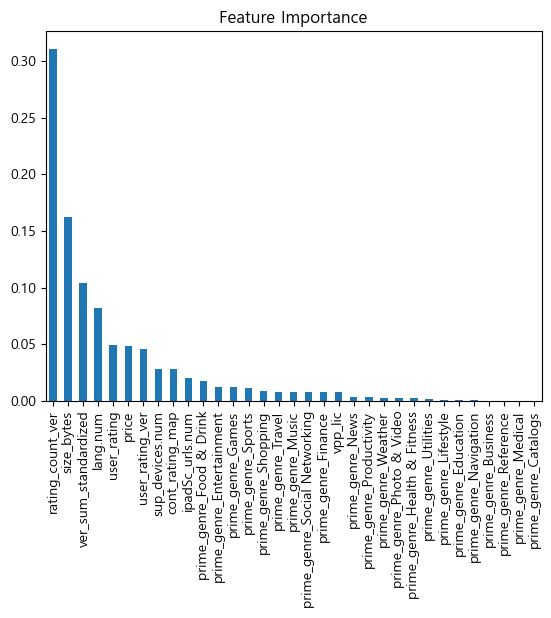

Feature Importances:
 size_bytes                       0.162788
price                            0.048780
rating_count_ver                 0.310847
user_rating                      0.049159
user_rating_ver                  0.045597
sup_devices.num                  0.028546
ipadSc_urls.num                  0.020509
lang.num                         0.081984
vpp_lic                          0.007463
ver_sum_standardized             0.103943
cont_rating_map                  0.028495
prime_genre_Business             0.000156
prime_genre_Catalogs             0.000002
prime_genre_Education            0.000890
prime_genre_Entertainment        0.012361
prime_genre_Finance              0.007594
prime_genre_Food & Drink         0.017221
prime_genre_Games                0.012092
prime_genre_Health & Fitness     0.002272
prime_genre_Lifestyle            0.001157
prime_genre_Medical              0.000006
prime_genre_Music                0.007791
prime_genre_Navigation           0.000827
prime_genre_

In [257]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

print("Feature Importances:\n", feature_importances)

## 5.3. 불필요한 특성 제거

In [258]:
low_importance_features = feature_importances[feature_importances < 0.01].index
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

print("Removed Features:", low_importance_features)

Removed Features: Index(['vpp_lic', 'prime_genre_Business', 'prime_genre_Catalogs',
       'prime_genre_Education', 'prime_genre_Finance',
       'prime_genre_Health & Fitness', 'prime_genre_Lifestyle',
       'prime_genre_Medical', 'prime_genre_Music', 'prime_genre_Navigation',
       'prime_genre_News', 'prime_genre_Photo & Video',
       'prime_genre_Productivity', 'prime_genre_Reference',
       'prime_genre_Shopping', 'prime_genre_Social Networking',
       'prime_genre_Travel', 'prime_genre_Utilities', 'prime_genre_Weather'],
      dtype='object')


In [259]:
X_train.head()

,size_bytes,price,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,ver_sum_standardized,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
3378,-0.178275,-0.593019,-0.293443,0.646307,-1.774856,0.156950,0.654564,-0.004479,1,-0.013497,...,False,False,False,False,False,False,False,False,False,False
3243,-0.251586,0.221095,-0.288762,0.646307,0.422434,-0.133056,0.654564,-0.299589,1,-0.013497,...,False,False,False,False,False,False,False,False,False,False
6946,-0.375126,1.448402,-0.223229,-0.008615,0.147772,-0.133056,-1.857514,0.290630,1,-0.013497,...,False,False,False,False,False,False,False,False,False,False
5827,-0.518549,-0.188007,-0.282911,-0.336076,-0.401550,-0.133056,-0.852683,-0.447143,1,-0.013497,...,False,True,False,False,False,False,False,False,False,False
1028,-0.196555,-0.188007,0.446149,0.318846,0.422434,1.606981,-0.350267,-0.447143,1,-0.013497,...,False,False,False,False,False,False,False,False,False,False


## 5.4 Feature Selection에 대해 성능확인

In [260]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# 모델 정의
models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
}

# 결과 저장
results_reduced = {}

# K-Fold Cross-Validation으로 각 모델의 성능 측정
for name, model in models.items():
    # RMSE 계산
    mse_scores = cross_val_score(model, X_train_reduced, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    
    # MAE 계산
    mae_scores = cross_val_score(model, X_train_reduced, y_train, scoring='neg_mean_absolute_error', cv=5)
    mae_scores = -mae_scores
    
    # MSLE 계산
    msle_scores = cross_val_score(model, X_train_reduced, y_train, scoring=custom_msle_scorer, cv=5)
    msle_scores = -msle_scores  # 부호 반전 필요
    
    # 결과 저장
    results_reduced[name] = {
        "Mean RMSE": np.mean(rmse_scores),
        "Std RMSE": np.std(rmse_scores),
        "Mean MAE": np.mean(mae_scores),
        "Std MAE": np.std(mae_scores),
        "Mean MSLE": np.mean(msle_scores),
        "Std MSLE": np.std(msle_scores),
    }

# 결과를 DataFrame으로 출력
results_reduced_df = pd.DataFrame(results_reduced).T
print(results_reduced_df)

                   Mean RMSE  Std RMSE  Mean MAE   Std MAE  Mean MSLE  \
Ridge               0.334165  0.031286  0.132905  0.006234   0.014249   
Decision Tree       0.465109  0.031036  0.145987  0.012806   0.025648   
Random Forest       0.326120  0.028428  0.119332  0.008595   0.013872   
Gradient Boosting   0.336217  0.033284  0.122485  0.010101   0.014140   
XGBoost             0.345451  0.024408  0.130854  0.010608   0.015915   

                   Std MSLE  
Ridge              0.002067  
Decision Tree      0.003275  
Random Forest      0.001814  
Gradient Boosting  0.002352  
XGBoost            0.001680  


### Feature selection 진행 후 확인 결과, 전체적으로 성능이 향상되었다.
### Feature Selection에 대해 CV 진행하였다.

## 5.4.1 Ridge

In [261]:
# Ridge 하이퍼파라미터 범위 설정
ridge_params = {
    'alpha': [0.1, 1, 10, 100, 200, 500]
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
ridge_model = Ridge()
ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
ridge_grid.fit(X_train_reduced, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Ridge):", ridge_grid.best_params_)

# 최적 모델로 훈련 데이터 평가
best_ridge = ridge_grid.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_reduced)

# RMSE, MAE, MSLE 계산 (훈련 데이터)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))  # RMSE
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)  # MAE
train_msle_ridge = mean_squared_log_error(y_train + 1, y_train_pred_ridge + 1)  # MSLE

# 결과 출력
print("Train RMSE (Ridge):", train_rmse_ridge)
print("Train MAE (Ridge):", train_mae_ridge)
print("Train MSLE (Ridge):", train_msle_ridge)


Best Parameters (Ridge): {'alpha': 500}
Train RMSE (Ridge): 0.3331558117024765
Train MAE (Ridge): 0.13086099241886975
Train MSLE (Ridge): 0.013928796715805233


## 5.4.2 Random Forest

In [262]:
# Random Forest 하이퍼파라미터 범위 설정
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV로 최적 하이퍼파라미터 탐색
rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=20,  # 랜덤 조합 20개 탐색
    scoring='neg_mean_squared_error',  # MSE 기반
    cv=5,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train_reduced, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Random Forest):", rf_random.best_params_)

# 최적 모델로 훈련 데이터 평가
best_rf = rf_random.best_estimator_
y_train_pred_rf = best_rf.predict(X_train_reduced)

# RMSE, MAE, MSLE 계산 (훈련 데이터)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))  # RMSE
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)  # MAE
train_msle_rf = mean_squared_log_error(y_train + 1, y_train_pred_rf + 1)  # MSLE

# 결과 출력
print("Train RMSE (Random Forest):", train_rmse_rf)
print("Train MAE (Random Forest):", train_mae_rf)
print("Train MSLE (Random Forest):", train_msle_rf)


Best Parameters (Random Forest): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Train RMSE (Random Forest): 0.2315939481872939
Train MAE (Random Forest): 0.0789517749052059
Train MSLE (Random Forest): 0.005941149404046681


## 5.4.3 Gradient Boosting

In [263]:
# Gradient Boosting 하이퍼파라미터 범위 설정
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
gb_grid.fit(X_train_reduced, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Gradient Boosting):", gb_grid.best_params_)

# 최적 모델로 훈련 데이터 평가
best_gb = gb_grid.best_estimator_
y_train_pred_gb = best_gb.predict(X_train_reduced)

# RMSE, MAE, MSLE 계산 (훈련 데이터)
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))  # RMSE
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)  # MAE
train_msle_gb = mean_squared_log_error(y_train + 1, y_train_pred_gb + 1)  # MSLE

# 결과 출력
print("Train RMSE (Gradient Boosting):", train_rmse_gb)
print("Train MAE (Gradient Boosting):", train_mae_gb)
print("Train MSLE (Gradient Boosting):", train_msle_gb)


Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Train RMSE (Gradient Boosting): 0.3095309120055885
Train MAE (Gradient Boosting): 0.11586395139555294
Train MSLE (Gradient Boosting): 0.011714095293924703


## 5.4.4 Gradient Boosting

In [264]:
# Gradient Boosting 하이퍼파라미터 범위 설정
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params,
    scoring='neg_mean_squared_error',  # MSE 기반으로 튜닝
    cv=5,
    n_jobs=-1
)
gb_grid.fit(X_train_reduced, y_train)

# 최적의 파라미터 출력
print("Best Parameters (Gradient Boosting):", gb_grid.best_params_)

# 최적 모델로 훈련 데이터 평가
best_gb = gb_grid.best_estimator_
y_train_pred_gb = best_gb.predict(X_train_reduced)

# RMSE, MAE, R² 계산 (훈련 데이터)
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))  # RMSE
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)  # MAE
train_r2_gb = r2_score(y_train, y_train_pred_gb)  # R²

# 결과 출력
print("Train RMSE (Gradient Boosting):", train_rmse_gb)
print("Train MAE (Gradient Boosting):", train_mae_gb)
print("Train R² (Gradient Boosting):", train_r2_gb)

Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Train RMSE (Gradient Boosting): 0.3095309120055885
Train MAE (Gradient Boosting): 0.11586395139555294
Train R² (Gradient Boosting): 0.23899902027668418


## 5.4.5 XGBoost

In [265]:
# XGBoost 하이퍼파라미터 범위 설정
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# RandomizedSearchCV로 최적 하이퍼파라미터 탐색
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=20,  # 랜덤 조합 20개 탐색
    scoring='neg_mean_squared_error',  # MSE 기반
    cv=5,
    random_state=42,
    n_jobs=-1
)
xgb_random.fit(X_train_reduced, y_train)

# 최적의 파라미터 출력
print("Best Parameters (XGBoost):", xgb_random.best_params_)

# 최적 모델로 훈련 데이터 평가
best_xgb = xgb_random.best_estimator_
y_train_pred_xgb = best_xgb.predict(X_train_reduced)

# RMSE, MAE, MSLE 계산 (훈련 데이터)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))  # RMSE
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)  # MAE
train_msle_xgb = mean_squared_log_error(y_train + 1, y_train_pred_xgb + 1)  # MSLE

# 결과 출력
print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Train MAE (XGBoost):", train_mae_xgb)
print("Train MSLE (XGBoost):", train_msle_xgb)


Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Train RMSE (XGBoost): 0.28727848139289813
Train MAE (XGBoost): 0.10312886138484596
Train MSLE (XGBoost): 0.009899820509554588


## Feature Selection & CV 조정에 대한 최종 결과

In [266]:
train_results = {
    "Model": ["Ridge", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Train RMSE": [train_rmse_ridge, train_rmse_rf, train_rmse_gb, train_rmse_xgb],
    "Train MAE": [train_mae_ridge, train_mae_rf, train_mae_gb, train_mae_xgb],
    "Train MSLE": [train_msle_ridge, train_msle_rf, train_msle_gb, train_msle_xgb]
}


# 결과를 DataFrame으로 변환
train_results_df = pd.DataFrame(train_results)

# 결과 출력
print(train_results_df)

               Model  Train RMSE  Train MAE  Train MSLE
0              Ridge    0.333156   0.130861    0.013929
1      Random Forest    0.231594   0.078952    0.005941
2  Gradient Boosting    0.309531   0.115864    0.011714
3            XGBoost    0.287278   0.103129    0.009900


세 모델 전부 Feature Selection 진행 전보다 향상된 성능을 보인다. 
Random Forest가 Gradient Boosting과 XGBoost보다 가장 우수한 RMSE, MAE, MSLE의 성능을 보인다. 

Random Forest는 특징 간 상관관계가 크지 않을 경우 강력한 성능을 보인다.
또한, Gradient Boosting과 XGBoost는 Random Forest보다 훈련 데이터의 노이즈를 과하게 학습하여 과적합이 발생했을 가능성이 있다.
Random Forest는 데이터의 특정 패턴에 지나치게 의존하지 않아 과적합 가능성이 상대적으로 낮다. 

## 5.5 test 모델에 대한 최종 평가

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np

# 최적 하이퍼파라미터로 Random Forest 모델 생성
final_rf_model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=4,
    max_depth=None,
    random_state=42
)

# 최적 모델로 훈련 데이터 학습
final_rf_model.fit(X_train_reduced, y_train)

# 테스트 데이터 예측
y_test_pred = final_rf_model.predict(X_test_reduced)

# RMSE, MAE, MSLE 계산
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE
test_mae = mean_absolute_error(y_test, y_test_pred)  # MAE
test_msle = mean_squared_log_error(y_test + 1, y_test_pred + 1)  # MSLE

# 결과 출력
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MSLE:", test_msle)

Test RMSE: 0.29788088659908996
Test MAE: 0.1096317687248713
Test MSLE: 0.011915245228368444


# 결과 비교 & 분석

### 1. 초기 실험 결과

| Model             | Mean RMSE | Mean MAE  | Mean MSLE |
|-------------------|-----------|-----------|-----------|
| Ridge             | 0.296231  | 0.140829  | 0.015385  |
| Decision Tree     | 0.352466  | 0.131601  | 0.019401  |
| Random Forest     | 0.297980  | 0.121759  | 0.014904  |
| Gradient Boosting | 0.316696  | 0.130735  | 0.016475  |
| XGBoost           | 0.295436  | 0.117622  | 0.014391  |




---

### 2. CV 적용
| Model             | Mean RMSE | Mean MAE  | Mean MSLE |
|-------------------|-----------|-----------|-----------|
| Ridge             | 0.334044  | 0.132052  | 0.014067  |
| Decision Tree     | 0.373294  | 0.126394  | 0.018067  |
| Random Forest     | 0.319148  | 0.112681  | 0.012817  |
| Gradient Boosting | 0.328009  | 0.119567  | 0.013422  |
| XGBoost           | 0.314879  | 0.111559  | 0.012100  |

---

### 3. Feature Selection
| Model             | Mean RMSE | Mean MAE  | Mean MSLE |
|-------------------|-----------|-----------|-----------|
| Ridge             | 0.334165  | 0.132905  | 0.014249  |
| Decision Tree     | 0.465109  | 0.145987  | 0.025648  |
| Random Forest     | 0.326120  | 0.119332  | 0.013872  |
| Gradient Boosting | 0.336217  | 0.122485  | 0.014140  |
| XGBoost           | 0.345451  | 0.130854  | 0.015915  |

---

### 4. Feature Selection & CV
| Model             | Train RMSE | Train MAE  | Train MSLE |
|-------------------|------------|------------|------------|
| Ridge             | 0.333156   | 0.130861   | 0.013929   |
| Random Forest     | 0.231594   | 0.078952   | 0.005941   |
| Gradient Boosting | 0.309531   | 0.115864   | 0.011714   |
| XGBoost           | 0.287278   | 0.103129   | 0.009900   |




## 5. Test Data에 대한 최적 모델 성능
- **Test RMSE**: 0.29788088659908996  
- **Test MAE**: 0.1096317687248713  
- **Test MSLE**: 0.011915245228368444

# 실험 결과 분석

## Train/Test 분리 및 Cross-Validation 검증
데이터 분리: 데이터를 Train-set과 Test-set으로 분리했으며, Train-set은 모델 학습 및 Cross-Validation 검증에 사용하였습니다. 최종 모델 평가는 Test-set을 사용하여 수행
Validation 과정: 5-Fold Cross-Validation(CV)을 적용해 모델의 성능을 검증함
CV 결과는 모델의 평균 RMSE, MAE, MSLE 지표로 평가

## CV 성능 비교 및 분석

| Model             | Mean RMSE | Mean MAE  | Mean MSLE |
|-------------------|-----------|-----------|-----------|
| Random Forest     | 0.319148  | 0.112681  | 0.012817  |
| Gradient Boosting | 0.328009  | 0.119567  | 0.013422  |
| XGBoost           | 0.314879  | 0.111559  | 0.012100  |

Ridge와 Decision Tree는 비교적 단순한 모델로, 복잡한 데이터 특성을 충분히 반영하지 못해 다른 모델보다 낮은 성능을 보임. 이때 Random Forest, Gradient Boosting, XGBoost는 앙상블 방법으로 안정적인 성능을 보였으며, 특히 XGBoost는 모든 지표에서 가장 우수한 결과를 기록.

## 앙상블 방법과 CV 성능 비교 및 분석
Random Forest는 개별 의사결정 나무의 평균화를 통해 과적합을 방지하며, 균형 잡힌 성능을 보임.
Gradient Boosting은 학습률과 단계별 성능 개선이 강점이나, 데이터의 노이즈에 민감할 가능성 있음.
XGBoost는 Gradient Boosting의 개선된 버전으로, 학습 속도와 규제 효과가 뛰어나 가장 우수한 성능을 기록함.

## Feature Selection 적용

Feature Selection만  적용 후, Ridge는 소폭의 성능 향상을 보였으나, Decision Tree와 Gradient Boosting은 성능 저하를 경험. Random Forest와 XGBoost도 약간의 성능 감소를 보였으며, 이는 일부 중요 Feature가 제거되어 모델 학습에 영향을 미쳤을 가능성 있음. Feature Selection은 간단한 모델(Ridge)에서 과적합 방지 효과를 발휘하나, 복잡한 모델에서는 성능 저하의 원인이 될 수 있음.

### 최종적으로 CV와 Featue Selectin 적용하자 성능이 크게 개선됨. 세 모델 전부 Feature Selection 진행 전보다 향상된 성능을 보였음. Random Forest가 Gradient Boosting과 XGBoost보다 가장 우수한 RMSE, MAE, MSLE의 성능을 보여 이에 대해 최종 test data를 적용함. 


## 최종 test data에 대한 해석

목표 달성함
0.05
- Test RMSE: 0.2979

RMSE가 낮다는 것은 모델이 예측 값과 실제 값의 편차를 잘 줄였음을 의미.
최종 Test 데이터에서 안정적이고 신뢰할 수 있는 성능을 확인.

- Test MAE: 0.1096

MAE는 절대적 오차의 평균으로, 예측 값과 실제 값의 정확한 차이를 나타냄.
Test 데이터에서 0.1096이라는 결과는 모델이 평균적으로 ±0.11 정도의 오차를 가지며 예측했다는 것을 의미.
일반적으로 RMSE보다 MAE가 낮은 것은 극단적인 오차가 잘 제어되었음을 보여줌.

- Test MSLE: 0.0119

목표한 0.05 이하의 값에 도달함. 
이는 주어진 문제의 특성(상대적 오차에 민감하지 않음)에 적합한 성능 지표로 판단됨.
